In [1]:
import pandas as pd
import numpy as np 
# NLP libraries
import string 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re 
from wordcloud import WordCloud 

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# MLlibraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
#loading dataset
df=pd.read_csv("train.csv",encoding="utf-8")
df.shape

(96364, 5)

In [3]:
#first five rows
df.head()

Unnamed: 0       id                                         tweet_text  \
0           0  1212762  @crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...   
1           1  1212763  Need Sick Character artâ“#art #artist #Artist...   
2           2  1212765  @The_Hulk_NFT @INagotchiNFT @Tesla @killabears...   
3           3  1212766  @CryptoBatzNFT @DarekBTW The first project in ...   
4           4  1212767  @sashadysonn The first project in crypto with ...   

           tweet_created_at  tweet_intent  
0  2022-08-06T16:56:36.000Z     Community  
1  2022-08-06T16:56:36.000Z      Giveaway  
2  2022-08-06T16:56:35.000Z  Appreciation  
3  2022-08-06T16:56:35.000Z     Community  
4  2022-08-06T16:56:34.000Z     Community

In [4]:
#information about dataset - datattype, nul values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96364 entries, 0 to 96363
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        96364 non-null  int64 
 1   id                96364 non-null  int64 
 2   tweet_text        96364 non-null  object
 3   tweet_created_at  96364 non-null  object
 4   tweet_intent      96364 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.7+ MB


In [5]:
#No of categories of tweets in dataset
df['tweet_intent'].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

Text(0.5, 1.0, 'Types of tweets')

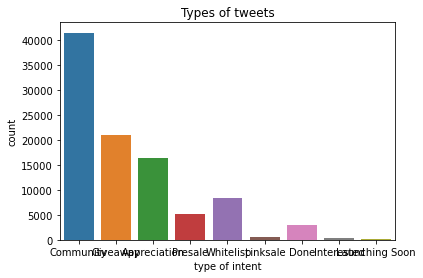

In [6]:
#visual representation of categories of tweets
sns.countplot(x='tweet_intent', data=df)
plt.xlabel('type of intent')
plt.title('Types of tweets')

In [7]:
#Sentence length analysis
def length(string):    
    return len(string)
df['length'] = df['tweet_text'].apply(length)

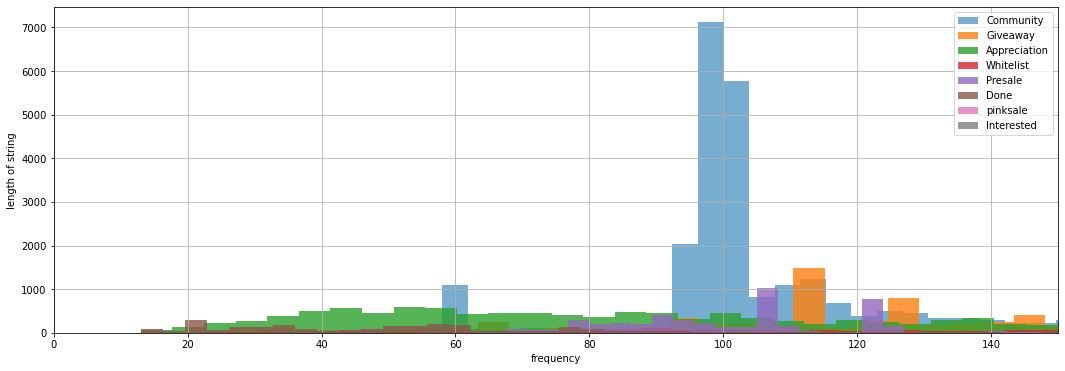

In [8]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df[df['tweet_intent'] == 'Community']['length'], alpha = 0.6, bins=bins, label='Community')
plt.hist(df[df['tweet_intent'] == 'Giveaway']['length'], alpha = 0.8, bins=bins, label='Giveaway')
plt.hist(df[df['tweet_intent'] == 'Appreciation']['length'], alpha = 0.8, bins=bins, label='Appreciation')
plt.hist(df[df['tweet_intent'] == 'Whitelist']['length'], alpha = 0.8, bins=bins, label='Whitelist')
plt.hist(df[df['tweet_intent'] == 'Presale']['length'], alpha = 0.8, bins=bins, label='Presale')
plt.hist(df[df['tweet_intent'] == 'Done']['length'], alpha = 0.8, bins=bins, label='Done')
plt.hist(df[df['tweet_intent'] == 'pinksale']['length'], alpha = 0.8, bins=bins, label='pinksale')
plt.hist(df[df['tweet_intent'] == 'Interested']['length'], alpha = 0.8, bins=bins, label='Interested')
plt.xlabel('frequency')
plt.ylabel('length of string')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

Word cloud

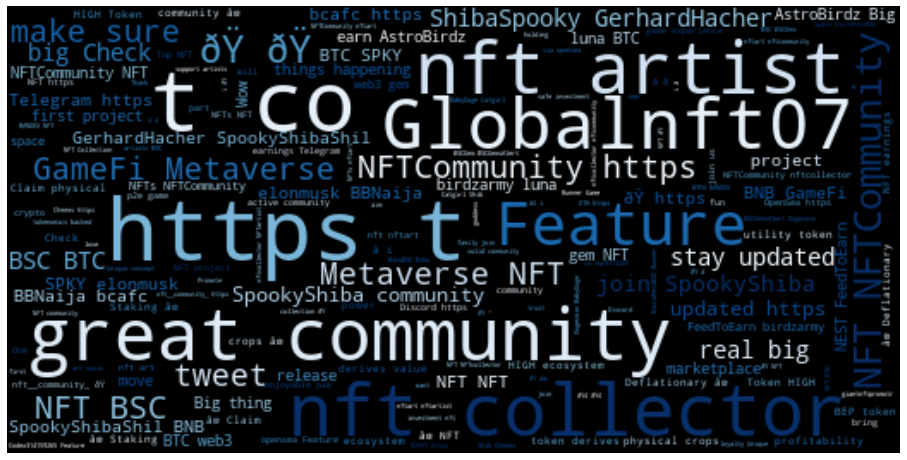

In [9]:
Community = df[df['tweet_intent'] =='Community']
# Create numpy list for community to visualize using wordcloud
Community_text = " ".join(Community.tweet_text.to_numpy().tolist())
#wordcloud of community
community_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Community_text)
plt.figure(figsize=(16,10))
plt.imshow(community_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

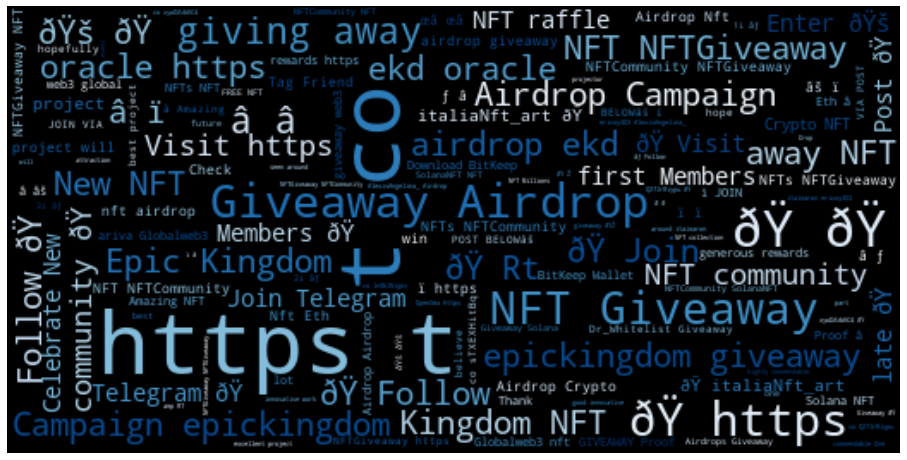

In [10]:
Giveaway = df[df['tweet_intent'] =='Giveaway']
# Create numpy list for giveaway to visualize using wordcloud
Giveaway_text = " ".join(Giveaway.tweet_text.to_numpy().tolist())
# wordcloud of giveaway
Giveaway_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Giveaway_text)
plt.figure(figsize=(16,10))
plt.imshow(Giveaway_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

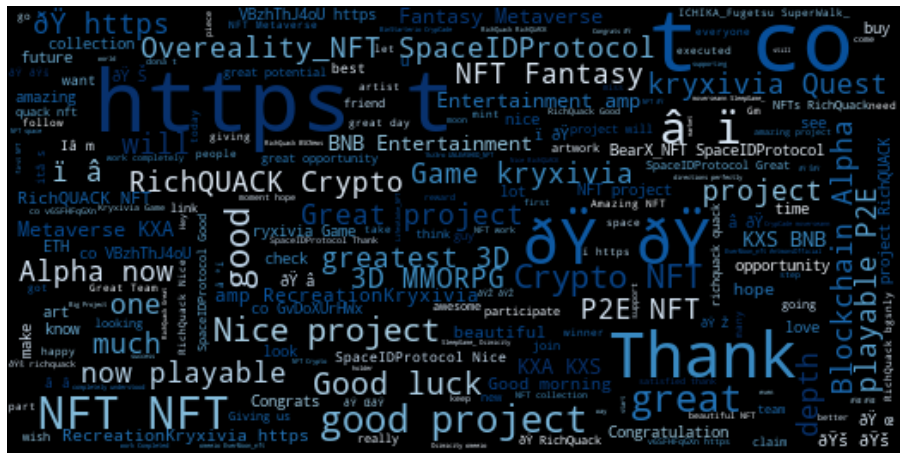

In [11]:
Appreciation = df[df['tweet_intent'] =='Appreciation']
# Create numpy list  for appreciation to visualize using wordcloud
Appreciation_text = " ".join(Appreciation.tweet_text.to_numpy().tolist())
# wordcloud of appreciation
Appreciation_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Appreciation_text)
plt.figure(figsize=(16,10))
plt.imshow(Appreciation_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

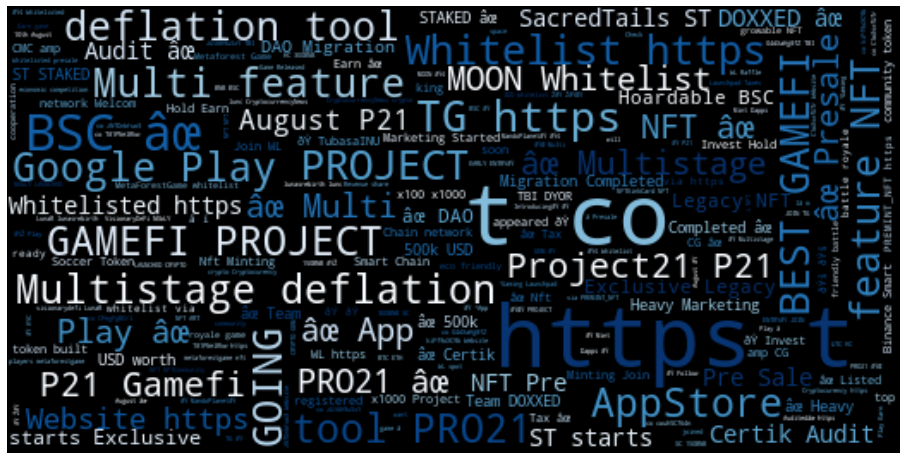

In [12]:
Whitelist = df[df['tweet_intent'] =='Whitelist']
# Create numpy list for whitelist to visualize using wordcloud
Whitelist_text = " ".join(Whitelist.tweet_text.to_numpy().tolist())
# wordcloud of whitelist
Whitelist_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Whitelist_text)
plt.figure(figsize=(16,10))
plt.imshow(Whitelist_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

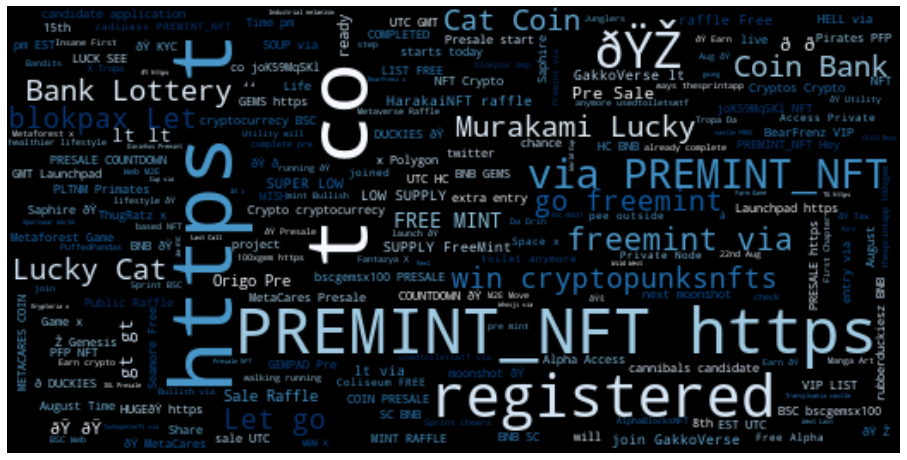

In [13]:
Presale = df[df['tweet_intent'] =='Presale']
# Create numpy list to presale to visualize using wordcloud
Presale_text = " ".join(Presale.tweet_text.to_numpy().tolist())
# wordcloud of presale
Presale_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Presale_text)
plt.figure(figsize=(16,10))
plt.imshow(Presale_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

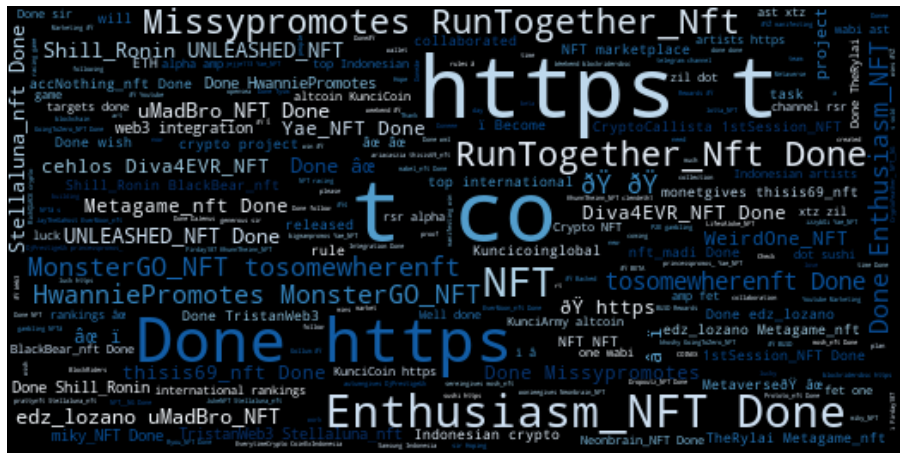

In [14]:
Done = df[df['tweet_intent'] =='Done']
# Create numpy list for done to visualize using wordcloud
Done_text = " ".join(Done.tweet_text.to_numpy().tolist())
# wordcloud of community
Done_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Done_text)
plt.figure(figsize=(16,10))
plt.imshow(Done_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

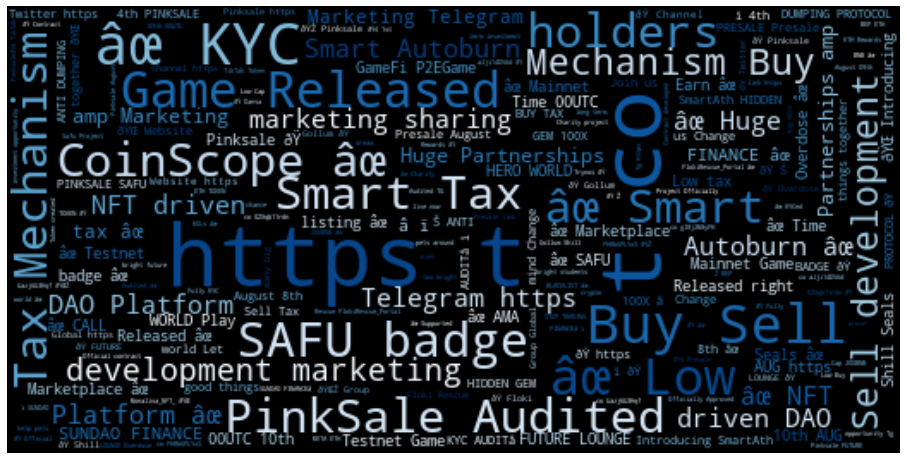

In [15]:
pinksale = df[df['tweet_intent'] =='pinksale']
# Create numpy list for pinksale to visualize using wordcloud
pinksale_text = " ".join(pinksale.tweet_text.to_numpy().tolist())
# wordcloud of pinksale
pinksale_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(pinksale_text)
plt.figure(figsize=(16,10))
plt.imshow(pinksale_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

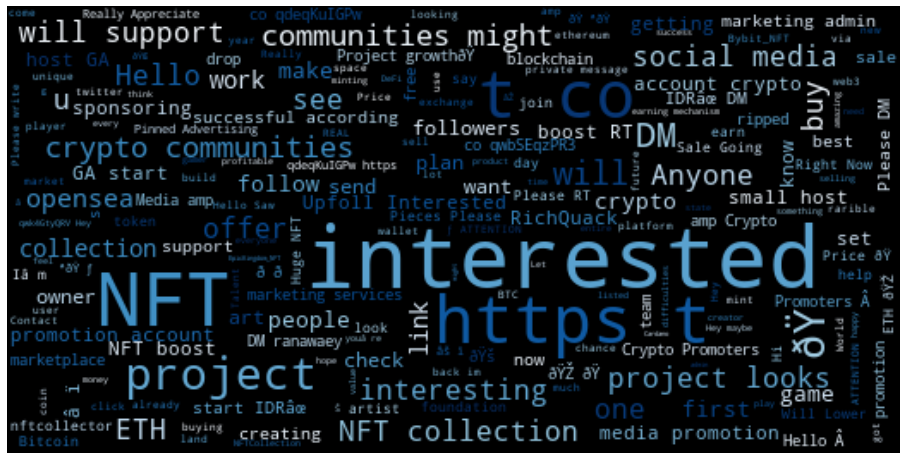

In [18]:
Interested = df[df['tweet_intent'] =='Interested']
# Create numpy list for interested to visualize using wordcloud
Interested_text = " ".join(Interested.tweet_text.to_numpy().tolist())
# wordcloud of interested
Interested_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(Interested_text)
plt.figure(figsize=(16,10))
plt.imshow(Interested_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

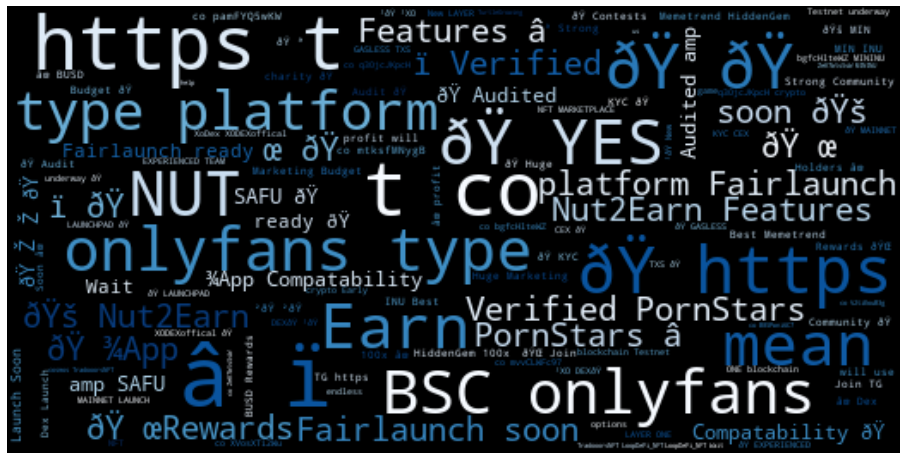

In [19]:
LaunchingSoon = df[df['tweet_intent'] =='Launching Soon']
# Create numpy list for launching soon to visualize using wordcloud
LS_text = " ".join(LaunchingSoon.tweet_text.to_numpy().tolist())
# wordcloud of launching soon
LS_cloud = WordCloud(width =520, height =260, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(LS_text)
plt.figure(figsize=(16,10))
plt.imshow(LS_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

Data cleaning

In [20]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', text)
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?¿>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('@$%€¤«»±•|¦†‡¬¨¢“”','',text)             
    return text
df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_text(x))

In [21]:
df['tweet_text'].head()

0    cryptobrody  moonrunnersnft itsukinft thelittl...
1    need sick character artâ“art artist artists a...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw the first project in cr...
4    sashadysonn the first project in crypto with m...
Name: tweet_text, dtype: object

In [22]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['tweet_text'] = df['tweet_text'].apply(lambda x: tokenizer.tokenize(x))

In [23]:
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

df['tweet_text'] = df['tweet_text'].apply(lambda x : remove_stopwords(x))
df['tweet_text'].head()

0    [cryptobrody, moonrunnersnft, itsukinft, theli...
1    [need, sick, character, artâ, art, artist, art...
2    [thehulknft, inagotchinft, tesla, killabearsnf...
3    [cryptobatznft, darekbtw, first, project, cryp...
4    [sashadysonn, first, project, crypto, move, ea...
Name: tweet_text, dtype: object

In [24]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text
df['tweet_text'] = df['tweet_text'].apply(lambda x : combine_text(x))
df['tweet_text'].head()

0    cryptobrody moonrunnersnft itsukinft thelittle...
1    need sick character artâ art artist artists an...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw first project crypto mo...
4    sashadysonn first project crypto move earn ast...
Name: tweet_text, dtype: object

In [25]:
#separating Independent and target variable
X= df.drop(['tweet_intent'], axis=1)
y = df['tweet_intent']
X.head()

Unnamed: 0       id                                         tweet_text  \
0           0  1212762  cryptobrody moonrunnersnft itsukinft thelittle...   
1           1  1212763  need sick character artâ art artist artists an...   
2           2  1212765  thehulknft inagotchinft tesla killabearsnft el...   
3           3  1212766  cryptobatznft darekbtw first project crypto mo...   
4           4  1212767  sashadysonn first project crypto move earn ast...   

           tweet_created_at  length  
0  2022-08-06T16:56:36.000Z     471  
1  2022-08-06T16:56:36.000Z     294  
2  2022-08-06T16:56:35.000Z      95  
3  2022-08-06T16:56:35.000Z     284  
4  2022-08-06T16:56:34.000Z     272

In [26]:
y.head()

0       Community
1        Giveaway
2    Appreciation
3       Community
4       Community
Name: tweet_intent, dtype: object

Split the data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=2)

Naive Bayes Classfier

In [28]:
model1 = Pipeline([ ('tfidf', TfidfVectorizer(use_idf=True)),   
                      ('clf', MultinomialNB(alpha=.01)),])

In [29]:
model1.fit(x_train['tweet_text'], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [30]:
#test accuracy
y_pred=model1.predict(x_test['tweet_text'])
print("Acuracy", accuracy_score(y_test, y_pred))

Acuracy 0.8946731234866828


In [31]:
#train accuracy
y_pred=model1.predict(x_train['tweet_text'])
print("Acuracy", accuracy_score(y_train, y_pred))

Acuracy 0.9728704005692769


In [32]:
#prediction
new = ['Just remember this is the beginning. You never too late.Go get in. Spread The Message!#FreeMint #FreeNFT #FreeArt #NFT #NFTs #ETH https://t.co/ogHk0QWaZo']
model1.predict(new)

array(['Giveaway'], dtype='<U14')

Logistic regression

In [33]:
model2 = Pipeline([('tfidf', TfidfVectorizer(use_idf=True)),   
                      ('model',LogisticRegression(multi_class='multinomial', solver='lbfgs')),
                     ])
model2.fit(x_train['tweet_text'], y_train)

C:\Users\hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LogisticRegression(multi_class='multinomial'))])

In [34]:
#test accuracy
y_pred=model2.predict(x_test['tweet_text'])
print("Acuracy", accuracy_score(y_test, y_pred))

Acuracy 0.952438602559668


In [35]:
#train accuracy
y_pred=model2.predict(x_train['tweet_text'])
print("Acuracy", accuracy_score(y_train, y_pred))

Acuracy 0.9714027337148279


In [36]:
#prediction
new = ['Just remember this is the beginning. You never too late.Go get in. Spread The Message!#FreeMint #FreeNFT #FreeArt #NFT #NFTs #ETH https://t.co/ogHk0QWaZo']
model2.predict(new)

array(['Giveaway'], dtype=object)

SVM

In [37]:
model3 = Pipeline([('tfidf', TfidfVectorizer(use_idf=True)),   
                      ('model',SVC()),
                     ])
model3.fit(x_train['tweet_text'], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', SVC())])

In [38]:
#test accuracy
y_pred=model3.predict(x_test['tweet_text'])
print("Acuracy", accuracy_score(y_test, y_pred))

Acuracy 0.9561397440332065


In [39]:
#train accuracy
y_pred=model3.predict(x_train['tweet_text'])
print("Acuracy", accuracy_score(y_train, y_pred))

Acuracy 0.9894150087467014


In [40]:
#prediction
new = ['Just remember this is the beginning. You never too late.Go get in. Spread The Message!#FreeMint #FreeNFT #FreeArt #NFT #NFTs #ETH https://t.co/ogHk0QWaZo']
model3.predict(new)

array(['Community'], dtype=object)

Random Forest

In [41]:
model4 = Pipeline([('tfidf', TfidfVectorizer(use_idf=True)),   
                      ('model',RandomForestClassifier(n_estimators=50)),
                     ])
model4.fit(x_train['tweet_text'], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', RandomForestClassifier(n_estimators=50))])

In [42]:
#test accuracy
y_pred=model4.predict(x_test['tweet_text'])
print("Acuracy", accuracy_score(y_test, y_pred))

Acuracy 0.9529920442753372


In [43]:
#train accuracy
y_pred=model4.predict(x_train['tweet_text'])
print("Acuracy", accuracy_score(y_train, y_pred))

Acuracy 0.9980727606961781


In [44]:
#prediction
new = ['Just remember this is the beginning. You never too late.Go get in. Spread The Message!#FreeMint #FreeNFT #FreeArt #NFT #NFTs #ETH https://t.co/ogHk0QWaZo']
model1.predict(new)

array(['Giveaway'], dtype='<U14')

In [45]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model4,file)